# 预备知识

## 环境配置及安装

- 安装环境

```
conda create -n d21-zh python=3.8
conda activate d2l-zh
```
- 安装包

```
pip install torch torchvision

```

- 下载代码并执行

```
wget https://zh-v2.d2l.ai/d2l-zh.zip
unzip d2l-zh.zip
jupyter notebook
```

## 数据操作

张量：n维数组，存储数据。一维类似向量的形式，二维类似矩阵，还有三维，四维等等。

numpy，pytorch和tensorflow都类似的数据结构，不同的是：
- numpy仅支持CPU计算
- pytorch和tensorflow中的张量支持GPU以及自动微分，更适合深度学习

### 入门

In [1]:
import torch

In [4]:
x = torch.arange(12)

In [5]:
x.shape

torch.Size([12])

In [6]:
x.numel()

12

In [11]:
x = x.reshape(3,4)

In [12]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [13]:
x.numel()

12

In [14]:
x.shape

torch.Size([3, 4])

In [15]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [16]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [17]:
torch.randn(3,4) # 标准正太分布

tensor([[-1.1739,  0.2720,  0.1459, -1.2332],
        [ 0.0629, -1.7555,  0.6596, -1.3191],
        [ 0.0202, -1.2555,  0.3289, -0.3718]])

In [18]:
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 运算符

In [19]:
# 按元素计算
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [20]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [21]:
# 张量连结
x = torch.arange(12,dtype=torch.float32).reshape(3,4)
y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((x,y),dim=0),torch.cat((x,y),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [22]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [23]:
x.sum()

tensor(66.)

### 广播机制

In [24]:
# 即使形状不同，我们仍然可以通过调用 广播机制（broadcasting mechanism）来执行按元素操作。

a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [25]:
# 将两个矩阵广播为一个更大的 3×2 矩阵

a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 索引和切片

In [26]:
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
x[-1],x[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [28]:
x[1,2] = 9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [29]:
x[0:2,:] = 12
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 节省内存

In [30]:
before = id(y)
y = y + x
id(y) == before

False

In [31]:
# 最好是执行原地操作:使用切片表示法将操作的结果分配给先前分配的数组
z = torch.zeros_like(y)
print("id(z):",id(z))
z[:] = x + y
print("id(z):",id(z))

id(z): 2799356134336
id(z): 2799356134336


In [ ]:
x[:] = x+y
x += y

### 转换为其他python对象

In [32]:
#  torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。
a = x.numpy()
b = torch.tensor(a)
type(a),type(b)

(numpy.ndarray, torch.Tensor)

In [33]:
a = torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 数据预处理 

我们经常从预处理原始数据开始， 而不是从那些准备好的张量格式数据开始。使用pandas预处理原始数据,并且能与张量兼容

### 读取数据集

In [37]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [38]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


### 处理缺失值

In [40]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_12556/38268100.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [41]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


### 转换为张量格式

In [43]:
x,y = torch.tensor(inputs.values),torch.tensor(outputs.values)
x,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## 线性代数

### 标量

In [44]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y,x*y,x/y,x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 向量

In [45]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [52]:
y = torch.tensor([2,3,4,1])
x.dot(y)

tensor(14)

### 矩阵

In [46]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [47]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

### 张量

向量是一阶张量，矩阵是二阶张量。 

In [48]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量算法的基本性质

In [49]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone()  # 通过分配新内存，将A的一个副本分配给B
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [50]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [51]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 降维

求和

In [56]:
A.sum(axis=0)

tensor([40., 45., 50., 55.])

In [57]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [58]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [59]:
# 非降维求和
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [60]:
# 由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。
A/sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [61]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [62]:
A.cumsum(axis=0) # 累积求和

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 点积

In [67]:
x = torch.tensor([0,1.0,2,3])
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [68]:
torch.sum(x * y)

tensor(6.)

### 矩阵-向量积

In [70]:
A.shape,x.shape,torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法 

In [71]:
B = torch.ones(4,3)
torch.mm(A,B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### 范数

在线性代数中，向量范数是将向量映射到标量的函数 f 。

范数的性质：
- 大于等于0，等于0时有且仅有向量所有元素为0
- 满足三角不等式
- 如果所有元素按常数因子进行缩放，则范数也会按相同的常数因子的绝对值进行缩放

In [72]:
# l2范数
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

In [73]:
# l1范数
torch.abs(u).sum()

tensor(7.)

In [74]:
# 矩阵的Frobenius范数
torch.norm(torch.ones((4,9)))

tensor(6.)

In [75]:
B = torch.ones((4,9,9))
len(B)

4

## 微积分

### 积分
起源于逼近法，举例：正态分布里对某一区间的分布积分，可以得到事情发生在该区间的概率。

### 导数和微分

深度学习中目标函数优化的关键，选择对参数可微(可导)的损失函数，即可知道当参数增加或者减少一个无穷小的值，损失函数会以多快的速度增加或者减小。

In [76]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

In [77]:
# x = 1时，导数时接近2的
def numerical_lim(f,x,h):
    return (f(x+h)-f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h *= 0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


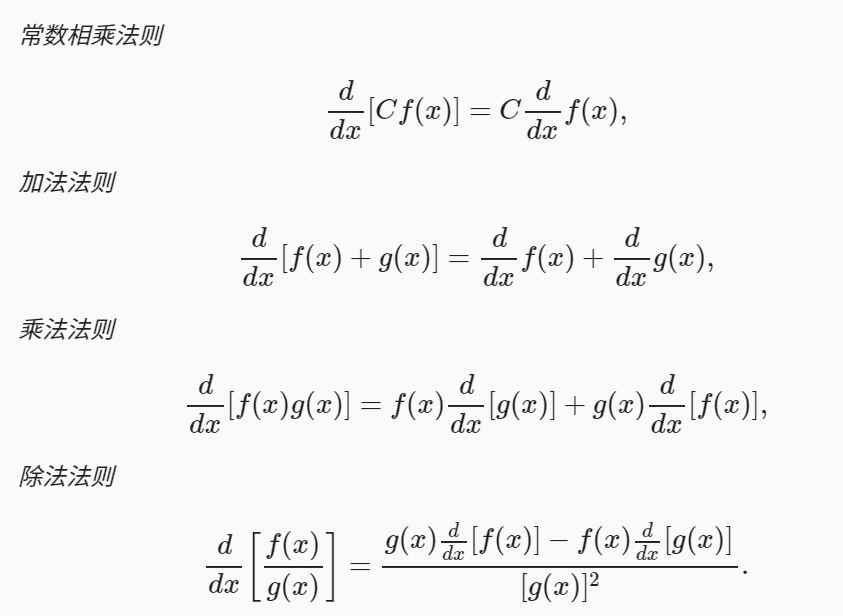

In [79]:
# 注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中。 
# 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）

def use_svg_display(): #@save
    """使用svg格式在Jupyter中显示绘图。"""
    display.set_matplotlib_formats('svg')

In [80]:
def set_figsize(figsize=(3.5,2.5)): #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [86]:
#@save
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    # 设置matplotlib轴
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [87]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y) # 共用一个横坐标取值
    
    axes.cla() # 清除当前座标轴
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_12556/2097589831.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


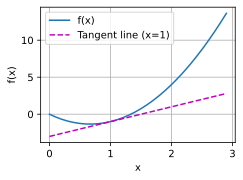

In [88]:
# 绘制函数 u=f(x) 及其在 x=1 处的切线 y=2x−3 
x = np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],xlabel='x',ylabel='f(x)',legend=['f(x)', 'Tangent line (x=1)'])

### 偏导

如果一个函数里有多个参数，多某一个参数求导时，把其他参数看作常数

### 梯度

对于函数f(x),x是参数向量，f(x)的梯度即对各个参数的偏导组成的向量。

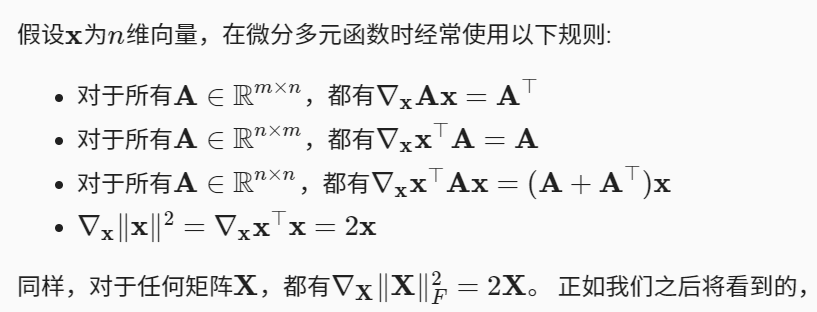

### 链式法则

由于函数大多以复合的形式出现，对各个参数求偏导遵从链式法则，如

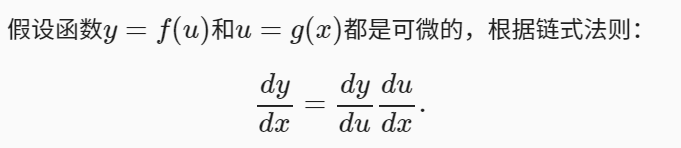

## 自动微分

手动求导是个很麻烦的操作，所以通过深度学习框架来自动微分。

根据我们设计的模型，系统会自动创建一个计算图，追踪数组是通过哪些操作进行组合输出。另外，通过反向传播去填充每个参数的梯度。

### 简单的例子 

y=2x⊤x 关于列向量 x 求导

In [89]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [92]:
# 计算梯度前，需要一个地方来保存梯度，这样不用每次更新梯度时都重新分配内存
x.requires_grad_(True) # 等价于 `x = torch.arange(4.0, requires_grad=True)`
x.grad  # 默认值是None

In [93]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [94]:
# 调用反向传播函数来自动计算y关于x每个分量的梯度
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [95]:
x.grad == 4 * x

tensor([True, True, True, True])

In [96]:
# # 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 非标量变量的反向传播

向量y关于向量x的导数的最自然解释是一个矩阵。

In [98]:
# 对非标量调用`backward`需要传入一个`gradient`参数，该参数指定微分函数关于`self`的梯度。

x.grad.zero_()
y = x * x # 等价于y = x1**2 + x2**2 + x3**2 + x4**2

# backward函数反向传播必须是对标量；
# 如果y是矩阵，要先把y转化为标量，再求导。转化为方法是：backward()函数传入一个矩阵m，计算y*m（y的各元素与m的元素对应相乘，不是矩阵相乘），再求矩阵元素之和，这样得到一个标量（实际就是y中的元素加权求和），然后才能求导
y.sum().backward() # 等价于y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

In [102]:
x.grad.zero_()
y = x * x
y.backward(torch.ones(len(x)))
x.grad

tensor([0., 2., 4., 6.])

### 分离计算 

希望将某些计算移动到记录的计算图之外。

现有y是x的函数，z是y和x的函数。

希望计算z关于x的梯度，同时把y视为一个常数（梯度不会向后流经y到x）

In [104]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [105]:
u

tensor([0., 1., 4., 9.])

In [106]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### python控制流的梯度计算

使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度

In [117]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

# 计算梯度
a = torch.randn(size=(),requires_grad=True)
d = f(a)
d.backward()

# 它在其输入a中是分段线性的。 
# 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a。

In [118]:
a.grad == d/a

tensor(True)

In [119]:
b = torch.randn(size=(),requires_grad=True)
d = f(b)
d.backward(retain_graph=True) 

In [120]:
b.grad

tensor(1024.)

In [121]:
d.backward()

In [122]:
b.grad

tensor(2048.)

### 练习

使 f(x)=sin(x) ，绘制 f(x) 和 df(x)dx 的图像，其中后者不使用 f′(x)=cos(x) 。

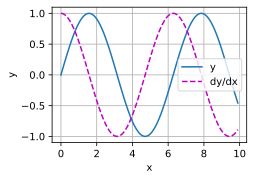

In [123]:
from d2l import torch as d2l
x=torch.arange(0.,10.,0.1)
x.requires_grad_(True)
y=torch.sin(x)
y.sum().backward()
d2l.plot(x.detach(),[y.detach(),x.grad],'x','y',legend=['y','dy/dx'])

## 概率

机器学习就是为了预测。

概率即一个发生的可能性。

推荐系统中，预测用户点击某个商品的概率。
医疗中，预测用户是否患某个疾病的概率。

### 基本概率论

举例：掷骰子

In [124]:
%matplotlib inline
import torch
from torch.distributions import multinomial # 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。
from d2l import torch as d2l

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引 i 处的值是采样结果中 i 出现的次数。

In [125]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1,fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [126]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([0., 4., 3., 1., 1., 1.])

一组实验统计1000次投掷后，每个数字被投中多少次。

In [127]:
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts / 1000

tensor([0.1580, 0.1580, 0.1600, 0.1900, 0.1710, 0.1630])

做500组实验，每组实验统计10次

In [128]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))

In [131]:
cum_counts = counts.cumsum(dim=0)

In [132]:
cum_counts

tensor([[  3.,   0.,   3.,   1.,   1.,   2.],
        [  7.,   0.,   5.,   1.,   3.,   4.],
        [  8.,   2.,   5.,   3.,   7.,   5.],
        ...,
        [841., 833., 816., 840., 814., 836.],
        [846., 834., 818., 840., 815., 837.],
        [847., 838., 820., 841., 817., 837.]])

In [137]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

In [138]:
estimates # 1/6 大约是0.167

tensor([[0.3000, 0.0000, 0.3000, 0.1000, 0.1000, 0.2000],
        [0.3500, 0.0000, 0.2500, 0.0500, 0.1500, 0.2000],
        [0.2667, 0.0667, 0.1667, 0.1000, 0.2333, 0.1667],
        ...,
        [0.1689, 0.1673, 0.1639, 0.1687, 0.1635, 0.1679],
        [0.1695, 0.1671, 0.1639, 0.1683, 0.1633, 0.1677],
        [0.1694, 0.1676, 0.1640, 0.1682, 0.1634, 0.1674]])

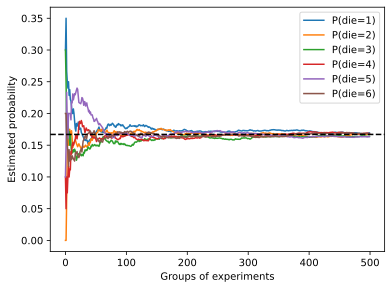

In [139]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))

# 一条横线 
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

可以看到随着实验次数增加，每个数字被掷中的概率越来越接近1/6

### 概率论公理

- 样本空间
- 事件
- 事件发生的概率

> 概率大于等于0

#### 随机变量

- 离散随机变量
- 连续随机变量（概率分布和概率分布密度）
- 期望和方差

### 处理多个随机变量

#### 联合概率

假设我们有一系列随机变量，例如 A 、 B 和 C ，其中 B 只依赖于 A ，而 C 只依赖于 B ，你能简化联合概率 P(A,B,C) 吗？（提示：这是一个马尔可夫链。)

#### 条件概率

#### 贝叶斯定理

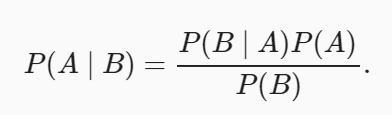

#### 边际化

为了能进行事件概率求和，我们需要求和法则（sum rule）， 即 B 的概率相当于计算 A 的所有可能选择，并将所有选择的联合概率聚合在一起

#### 独立性 